# Modeling and Simulation in Python

Chapter 8: Pharmacokinetics

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


We'll start with the same code we saw last time: the magic command that tells Jupyter where to put the figures, and the import statement that gets the function defined in the `modsim` module.

In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt|

# tempo switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

In [2]:
df = pd.read_csv('glucose_insulin.csv', index_col='time')
df

,glucose,insulin
time,,
0,92,11
2,350,26
4,287,130
6,251,85
8,240,51
10,216,49
12,211,45
14,205,41
16,196,35


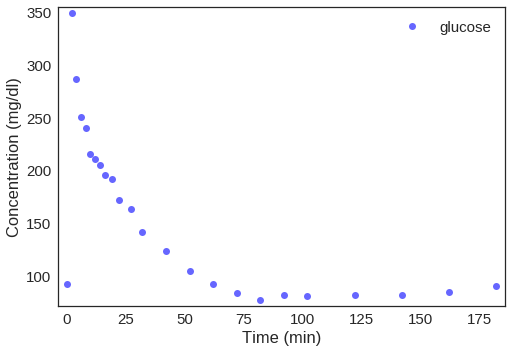

In [3]:
plot(df.glucose, 'bo', label='glucose')
decorate(xlabel='Time (min)',
         ylabel='Concentration (mg/dl)')

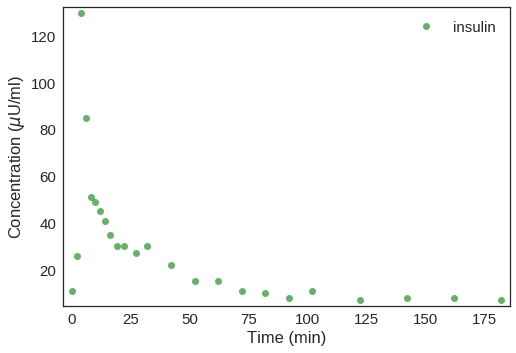

In [4]:
plot(df.insulin, 'go', label='insulin')
decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/ml)')

Saving figure to file chap08-fig01.pdf


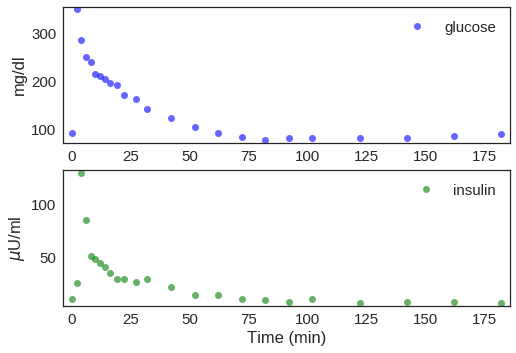

In [5]:
subplot(2, 1, 1)
plot(df.glucose, 'bo', label='glucose')
decorate(ylabel='mg/dl')

subplot(2, 1, 2)
plot(df.insulin, 'go', label='insulin')
decorate(xlabel='Time (min)',
         ylabel='$\mu$U/ml')

savefig('chap08-fig01.pdf')

In [6]:
%psource interpolate

In [7]:
I = interpolate(df.insulin)

In [8]:
I(7)

array(68.0)

Saving figure to file chap08-fig02.pdf


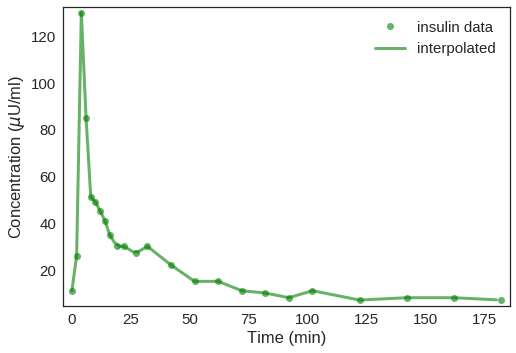

In [9]:
ts = arange(0, 182, 2)

plot(df.insulin, 'go', label='insulin data')
plot(ts, I(ts), color='green', label='interpolated')

decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/ml)')

savefig('chap08-fig02.pdf')

**Exercise:** [Read the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) of `scipy.interpolate.interp1d`.  Pass a keyword argument to `interpolate` to specify one of the other kinds of interpolation, and run the code again to see what it looks like. 

In [10]:
k1 = 0.03
k2 = 0.02
k3 = 1e-05
G0 = 290

In [11]:
Gb = df.glucose[0]
Ib = df.insulin[0]

In [12]:
init = State(G=G0, X=0)

In [13]:
system = System(init=init, 
                k1=k1, k2=k2, k3=k3,
                I=I, Gb=Gb, Ib=Ib,
                t0=0, t_end=182, dt=2)

In [14]:
def update_func(state, t, system):
    """Updates the glucose minimal model.
    
    state: State object
    t: time in min
    system: System object
    
    returns: State object
    """
    G, X = state
    unpack(system)
        
    dGdt = -k1 * (G - Gb) - X*G
    dXdt = k3 * (I(t) - Ib) - k2 * X
    
    G += dGdt * dt
    X += dXdt * dt

    return State(G=G, X=X)

In [15]:
update_func(init, 0, system)

,value
G,278.12
X,0.00


In [16]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a DataFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    df = TimeFrame(columns=init.index)
    df.loc[t0] = init
    
    for t in arange(t0, t_end, dt):
        df.loc[t+dt] = update_func(df.loc[t], t, system)
    
    system.results = df

In [17]:
%timeit run_simulation(system, update_func)

1 loop, best of 3: 185 ms per loop


In [18]:
system.results

,G,X
0,290.000000,0.000000
2,278.120000,0.000000
4,266.952800,0.000300
6,256.295460,0.002668
8,245.070140,0.004041
10,233.905138,0.004680
12,223.201651,0.005252
14,212.984844,0.005722
16,203.288207,0.006093
18,194.133461,0.006330


Saving figure to file chap08-fig03.pdf


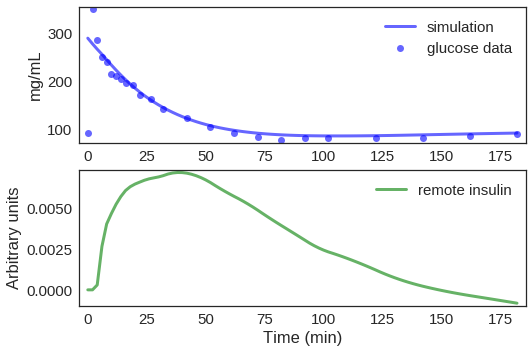

In [19]:
subplot(2, 1, 1)

plot(system.results.G, 'b-', label='simulation')
plot(df.glucose, style='bo', label='glucose data')
decorate(ylabel='mg/mL')

subplot(2, 1, 2)

plot(system.results.X, style='g-', label='remote insulin')

decorate(xlabel='Time (min)', 
         ylabel='Arbitrary units')

savefig('chap08-fig03.pdf')

In [20]:
def slope_func(state, t, system):
    """Computes derivatives of the glucose minimal model.
    
    state: State object
    t: time in min
    system: System object
    
    returns: derivatives of G and X
    """
    G, X = state
    unpack(system)
    
    dGdt = -k1 * (G - Gb) - X*G
    dXdt = k3 * (I(t) - Ib) - k2 * X
    
    return dGdt, dXdt

In [21]:
slope_func(init, 0, system)

(-5.9399999999999995, 0.0)

In [22]:
%psource run_odeint

In [23]:
system2 = System(init=init, 
                k1=k1, k2=k2, k3=k3,
                I=I, Gb=Gb, Ib=Ib,
                ts=df.index)

In [24]:
%timeit run_odeint(system2, slope_func)

10 loops, best of 3: 135 ms per loop


In [25]:
system2.results

,G,X
time,,
0,290.000000,0.000000
2,278.441946,0.000148
4,267.246339,0.001463
6,255.791154,0.003294
8,244.385049,0.004280
10,233.385689,0.004877
12,222.875391,0.005391
14,212.883104,0.005807
16,203.432604,0.006108


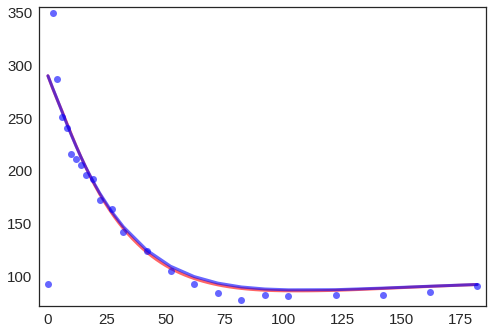

In [26]:
plot(system.results.G, 'r-')
plot(system2.results.G, 'b-')
plot(df.glucose, 'bo')

In [27]:
diff = system.results - system2.results
percent_diff = diff / system2.results * 100
percent_diff.dropna()

,G,X
2,-0.115624,-100.000000
4,-0.109838,-79.488129
6,0.197156,-19.008861
8,0.280333,-5.584132
10,0.222571,-4.045820
12,0.146387,-2.574882
14,0.047791,-1.457351
16,-0.070980,-0.241936
22,-0.506705,0.770903
32,-1.135176,0.739019


### Optimization

In [61]:
k1 = 0.03
k2 = 0.02
k3 = 1e-05
G0 = 290

In [62]:
Gb = df.glucose[0]
Ib = df.insulin[0]

In [63]:
def slope_func(state, t, system):
    """Computes derivatives of the glucose minimal model.
    
    state: State object
    t: time in min
    system: System object
    
    returns: derivatives of G and X
    """
    G, X = state
    unpack(system)
    
    dGdt = -k1 * (G - Gb) - X*G
    dXdt = k3 * (I(t) - Ib) - k2 * X
    
    return dGdt, dXdt

In [64]:
def make_system(G0, k1, k2, k3, data):
    """Makes a System object with the given parameters.
    
    G0: initial blood glucose
    k1: rate parameter
    k2: rate parameter
    k3: rate parameter
    data: DataFrame
    
    returns: System object
    """
    init = State(G=G0, X=0)
    system = System(init=init, 
                    k1=k1, k2=k2, k3=k3,
                    Gb=Gb, Ib=Ib, 
                    I=interpolate(data.insulin),
                    ts=data.index)
    return system

In [65]:
def error_func(params, data):
    """Computes an array of errors to be minimized.
    
    params: sequence of parameters
    data: DataFrame of values to be matched
    
    returns: array of errors
    """
    print(params)
    
    # make a System with the given parameters
    system = make_system(*params, data)
    
    # solve the ODE
    run_odeint(system, slope_func)
    
    # compute the difference between the model
    # results and actual data
    error = system.results.G - data.glucose
    return error[3:]

In [66]:
params = G0, k1, k2, k3

In [67]:
error_func(params, df)

(290, 0.03, 0.02, 1e-05)


time
6       4.791154
8       4.385049
10     17.385689
12     11.875391
14      7.883104
16      7.432604
19     -1.688894
22      6.430723
27     -1.858707
32      4.627308
42      0.272257
52      4.125928
62      7.310554
72      9.102455
82     12.434359
92      5.498085
102     5.712650
122     4.844866
142     6.356758
162     5.136930
182     1.795663
dtype: float64

In [68]:
from scipy.optimize import leastsq

def fit_leastsq(error_func, params, data, **kwargs):
    """Find the parameters that yield the best fit for the data.
    
    `params` can be a sequence, array, or Series
    
    error_func: function that computes a sequence of errors
    params: initial guess for the best parameters
    data: the data to be fit; will be passed to min_fun
    kwargs: any other arguments are passed to leastsq
    """
    # to pass `data` to `leastsq`, we have to put it in a tuple
    args = (data,)
    
    # override `full_output` so we get a message if something goes wrong
    kwargs['full_output'] = True
    
    # run leastsq
    best_params, _, _, mesg, ier = leastsq(error_func, x0=params, args=args, **kwargs)

    #TODO: check why logging.info is not visible
    
    # check for errors
    if ier in [1, 2, 3, 4]:
        print("""modsim.py: scipy.optimize.leastsq ran successfully
                 and returned the following message:\n""" + mesg)
    else:
        logging.error("""modsim.py: When I ran scipy.optimize.leastsq, something
                         went wrong, and I got the following message:""")
        raise Exception(mesg)
        
    # return the best parameters
    return best_params

In [69]:
best_params = fit_leastsq(error_func, params, df)

[  2.90000000e+02   3.00000000e-02   2.00000000e-02   1.00000000e-05]
[  2.90000000e+02   3.00000000e-02   2.00000000e-02   1.00000000e-05]
[  2.90000000e+02   3.00000000e-02   2.00000000e-02   1.00000000e-05]
[  2.90000004e+02   3.00000000e-02   2.00000000e-02   1.00000000e-05]
[  2.90000000e+02   3.00000004e-02   2.00000000e-02   1.00000000e-05]
[  2.90000000e+02   3.00000000e-02   2.00000003e-02   1.00000000e-05]
[  2.90000000e+02   3.00000000e-02   2.00000000e-02   1.00000001e-05]
[  2.78818399e+02   2.85172789e-02   1.61498422e-02   1.19387480e-05]
[  2.78818404e+02   2.85172789e-02   1.61498422e-02   1.19387480e-05]
[  2.78818399e+02   2.85172793e-02   1.61498422e-02   1.19387480e-05]
[  2.78818399e+02   2.85172789e-02   1.61498425e-02   1.19387480e-05]
[  2.78818399e+02   2.85172789e-02   1.61498422e-02   1.19387482e-05]
[  2.77940795e+02   2.96093308e-02   7.34597326e-03   8.66828424e-06]
[  2.78755754e+02   2.90513812e-02   1.16634345e-02   1.04073063e-05]
[  2.78755758e+02   

In [70]:
system = make_system(*best_params, df)
run_odeint(system, slope_func)

Saving figure to file chap08-fig04.pdf


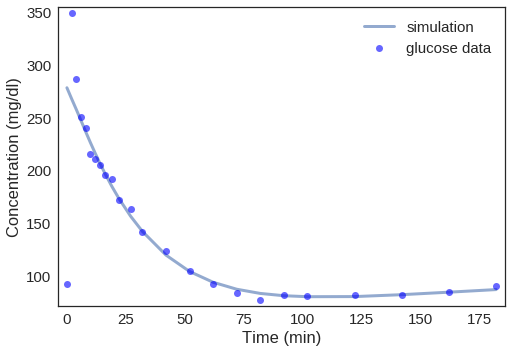

In [75]:
plot(system.results.G, label='simulation')
plot(df.glucose, style='bo', label='glucose data')

decorate(xlabel='Time (min)',
         ylabel='Concentration (mg/dl)')

savefig('chap08-fig04.pdf')

In [76]:
def indices(G0, k1, k2, k3):
    """Compute glucose effectiveness and insulin sensitivity.
    
    G0: initial blood glucose
    k1: rate parameter
    k2: rate parameter
    k3: rate parameter
    data: DataFrame
    
    returns: State object containing S_G and S_I
    """
    return State(S_G=k1, S_I=k3/k2)

In [77]:
indices(*best_params)

,value
S_G,0.028875
S_I,0.000893


**Exercise:**

In [41]:
I0 = 360
k = 0.25
gamma = 0.004
G_T = 80

In [42]:
I0 = 363
k = 0.267
gamma = 0.00407
G_T = 83.7

In [43]:
def make_system(I0, k, gamma, G_T, data):
    init = State(I=I0)
    system = System(init=init, 
                    k=k, gamma=gamma, G_T=G_T,
                    G=interpolate(data.glucose),
                    ts=data.index)
    return system

In [44]:
system = make_system(I0, k, gamma, G_T, df)

In [45]:
def slope_func(state, t, system):
    I = state
    unpack(system)
    t0 = ts[0]
    
    if G(t) > G_T:
        dIdt = gamma * (G(t) - G_T) * (t - t0) - k * I
    else:
        dIdt = -k * I
    
    return dIdt

In [46]:
slope_func(init, 0, system)

G   -74.390977
X     0.000000
dtype: float64

In [47]:
run_odeint(system, slope_func)
system.results

,I
time,
0,3.630000e+02
2,2.140991e+02
4,1.299709e+02
6,8.205447e+01
8,5.530527e+01
10,4.060859e+01
12,3.286383e+01
14,2.949919e+01
16,2.836173e+01


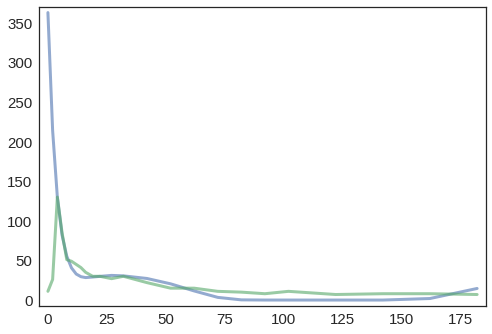

In [48]:
plot(system.results)
plot(df.insulin)

In [49]:
def error_func(params, data):
    """Computes an array of errors to be minimized.
    
    params: sequence of parameters
    actual: array of values to be matched
    
    returns: array of errors
    """
    print(params)
    
    # make a System with the given parameters
    system = make_system(*params, data)
    
    # solve the ODE
    run_odeint(system, slope_func)
    
    # compute the difference between the model
    # results and actual data
    error = system.results.I - data.insulin
    error /= data.insulin
    return error[2:]

In [50]:
params = [I0, k, gamma, G_T]
params

[363, 0.267, 0.00407, 83.7]

In [51]:
error_func(params, df)

[363, 0.267, 0.00407, 83.7]


time
4     -0.000224
6     -0.034653
8      0.084417
10    -0.171253
12    -0.269693
14    -0.280508
16    -0.189665
19    -0.030561
22    -0.004090
27     0.152568
32     0.018249
42     0.238580
52     0.366404
62    -0.231889
72    -0.693313
82    -0.976502
92    -0.997966
102   -0.999898
122   -0.999999
142   -1.000000
162   -0.757956
182    1.090361
dtype: float64

In [52]:
best_params = fit_leastsq(error_func, params, df)

[  3.63000000e+02   2.67000000e-01   4.07000000e-03   8.37000000e+01]
[  3.63000000e+02   2.67000000e-01   4.07000000e-03   8.37000000e+01]
[  3.63000000e+02   2.67000000e-01   4.07000000e-03   8.37000000e+01]
[  3.63000005e+02   2.67000000e-01   4.07000000e-03   8.37000000e+01]
[  3.63000000e+02   2.67000004e-01   4.07000000e-03   8.37000000e+01]
[  3.63000000e+02   2.67000000e-01   4.07000006e-03   8.37000000e+01]
[  3.63000000e+02   2.67000000e-01   4.07000000e-03   8.37000012e+01]
[  4.50059289e+02   2.39240722e-01   2.82337910e-03   8.41344528e+01]
[  4.50059296e+02   2.39240722e-01   2.82337910e-03   8.41344528e+01]
[  4.50059289e+02   2.39240726e-01   2.82337910e-03   8.41344528e+01]
[  4.50059289e+02   2.39240722e-01   2.82337914e-03   8.41344528e+01]
[  4.50059289e+02   2.39240722e-01   2.82337910e-03   8.41344540e+01]
[  3.77450139e+02   2.26284950e-01   2.86743777e-03   8.39124998e+01]
[  3.77450145e+02   2.26284950e-01   2.86743777e-03   8.39124998e+01]
[  3.77450139e+02   

In [53]:
system = make_system(*best_params, df)

In [54]:
run_odeint(system, slope_func)

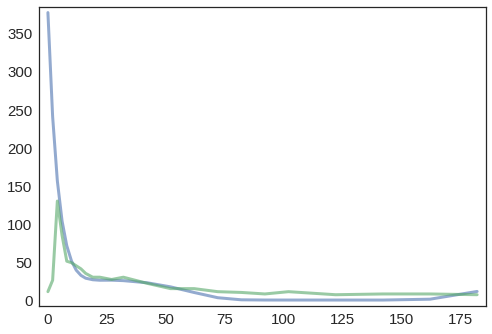

In [55]:
plot(system.results)
plot(df.insulin)

In [56]:
I_max = df.insulin.max()
Ib = df.insulin[0]
I_max, Ib

(130, 11)

In [57]:
Gb = df.glucose[0]
G0, Gb

(290, 92)

In [58]:
phi_1 = (I_max - Ib) / k / (G0 - Gb)
phi_1

2.6559879534236446

In [59]:
phi_2 = gamma * 1e4
phi_2

28.674377695327937